# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [5]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [16]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

In [23]:
x = sm.add_constant(tips[['size']])
y = tips.tip

lm = sm.OLS(y, x).fit()

RSS = sum(lm.resid ** 2)

TSS = sum((tips.tip - np.mean(tips.tip)) ** 2)
R2 = 1 - (RSS/TSS)

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     76.18
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           4.30e-16
Time:                        17:33:35   Log-Likelihood:                -391.56
No. Observations:                 244   AIC:                             787.1
Df Residuals:                     242   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1691      0.223      5.233      0.000       0.729       1.609
size           0.7118      0.082      8.728      0.000       0.551       0.872
==============================================================================
Omnibus:                       81.369   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.339
Skew:                           1.393   Prob(JB):                     4.42e-60
Kurtosis:                       7.373   Cond. No.                         8.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

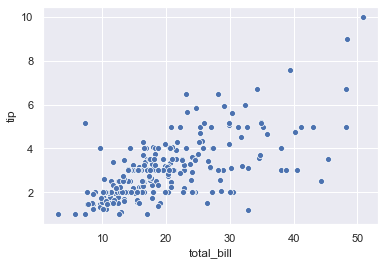

In [25]:
sns.scatterplot('total_bill', 'tip', data=tips)

4) Does your model meet the four assumptions expected of a linear model? Explain: